# CPC's farms mortality Data Analysis

# 1- Data describtion 

### A)Data period from Jan 2015 to Dec 2020

### B) data were gathered from m-tech database program following reports
##### 1- cpc brim weekley broiler summary by area
##### 2- flockes pleasment dinsity and total cycle time

### C) Attrebutes describtion

Date Sold: last date in sales prosses

Farm No: the farm name

House No: 

Hatch Hatchery: hatchery chicks resieved from at placment time

Placement Density:  (chicks placement on m2)

Avg Chick Wt: Weight of chick at placment day

Total Farm Head sold: nomber of chicken sold at the end of the farm period

Weight Sold (Farm): averge chicken Weight in selling period 

Age - End of Sales: 

Avg Chick Cost

Head Sold Koki (farm)

Head Sold Market

Head Placed: number of chicks placed at begining of farm

Avg Wt Sold (farm)

Total Mortality Dead : total mortality for every house at end of period

Feed Conversion CPC: how many grams gained per every kilo of food 

Broiler Index CPC: feed convertion / Daily Wt Gain

Daily Wt Gain


# 1- Data Wrangling


## Objectives


-   Handle missing values
-   Correct data format
-   Standardize and Normalize Data 

## A- Reading and cleaning the dataset

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
broiler_summary_ds = pd.read_csv('broiler_summary_ds.csv')
dinsity_ds = pd.read_csv('dinsity_ds.csv')
broiler_summary_ds

,Month,Unnamed: 1,Year,First Date Placed,Date Sold,Complex Entity No,Farm No,House No,Entity No,Hatch Hatchery List,...,Age - End of Sales,Avg Chick Cost,Head Sold Koki (farm),Head Sold Market,Head Placed,Avg Wt Sold (farm),Total Mortality Dead,Feed Conversion CPC,Broiler Index CPC,Daily Wt Gain
0,Growout Name: Nobaria broiler,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,10.0,2020.0,24/10/2020,25/11/2020,NOB19-117-H20,NOB19,H20,117.0,RAMBH,...,32.0,7.75,0,"15,160","16,825",1.668,1530.0,1.61,308.00,0.054
2,NaN,10.0,2020.0,24/10/2020,25/11/2020,NOB19-117-H19,NOB19,H19,117.0,RAMBH,...,32.0,7.75,0,"14,960","16,825",1.584,1630.0,1.62,276.12,0.049
3,NaN,10.0,2020.0,24/10/2020,25/11/2020,NOB19-117-H18,NOB19,H18,117.0,RAMBH,...,32.0,7.75,0,"15,230","16,825",1.617,1482.0,1.61,292.89,0.051
4,NaN,10.0,2020.0,24/10/2020,25/11/2020,NOB19-117-H17,NOB19,H17,117.0,RAMBH,...,32.0,7.75,0,"15,200","16,825",1.632,1324.0,1.62,288.55,0.051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12798,NaN,12.0,2014.0,04/12/2014,06/01/2015,SAF01-101-H01,SAF01,H01,101.0,NOBBH,...,33.0,3.00,"12,380",0,"13,200",1.639,820.0,1.63,290.80,0.050
12799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"31,405,911",1.625,NaN,1.57,304.04,0.052
12801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### a)drop unwanted columns and rows

In [3]:
#drop unwanted columns
broiler_summary_ds.drop(["Month", "Unnamed: 1", ], axis=1, inplace=True)

In [4]:
dinsity_ds.drop(dinsity_ds.columns[0:4], axis=1, inplace=True)

In [5]:
dinsity_ds.drop(dinsity_ds.columns[1:6], axis=1, inplace=True)

In [6]:
dinsity_ds.drop(dinsity_ds.columns[2:6], axis=1, inplace=True)

In [7]:
dinsity_ds.drop(dinsity_ds.columns[3:6], axis=1, inplace=True)

In [8]:
#drop unwanted rows
dinsity_ds.drop(dinsity_ds.index[:3], inplace=True) 
broiler_summary_ds.drop(broiler_summary_ds.loc[broiler_summary_ds['Hatch Hatchery List']=='CARGPH'].index, inplace=True)
broiler_summary_ds.drop(broiler_summary_ds.loc[broiler_summary_ds['Hatch Hatchery List']=='NOBBH, RAMBH'].index, inplace=True)
broiler_summary_ds.drop(broiler_summary_ds.loc[broiler_summary_ds['Hatch Hatchery List']=='MSRGPH'].index, inplace=True)
broiler_summary_ds.drop(broiler_summary_ds.loc[broiler_summary_ds['Hatch Hatchery List']== 'EXTHATCHLOC'].index, inplace=True)

#### b) make first row of dinsity_ds the header of thr dataframe

In [9]:
#make first row of dinsity_ds the header of thr dataframe
new_header = dinsity_ds.iloc[0] #grab the first row for the header
dinsity_ds = dinsity_ds[1:] #take the data less the header row
dinsity_ds.columns = new_header #set the header row as the df header

#### c)merge the two tables in one dataframe

In [10]:
#merge the two tables in one dataframe
All_data=pd.merge(broiler_summary_ds, dinsity_ds, on='Complex Entity No')
All_data

,Year,First Date Placed_x,Date Sold_x,Complex Entity No,Farm No,House No,Entity No,Hatch Hatchery List,Placement Density (chicks/m2),Avg Chick Wt,...,Cleaning period,Age at end of Sales CPC,Age at end of Sales CPC-MAX,AVG (Feed Additives) per K.g,AVG (Med) Others Per K.g,AVG Anntibtics Per K.g,AVG Disinfectant Per K.g,AVG Feed Additives Per K.g,AVG Vaccination Per K.g,AVG Vitamins Per K.g
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6019,32.20,36.5,0.000,11.320,32.192,16.833,16.237,67.270,7.925
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7672,32.77,36.5,0.000,8.796,31.136,17.342,18.343,67.657,7.071
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6903,32.37,36.5,0.000,9.448,33.662,17.830,17.235,66.553,7.929
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7736,32.53,36.5,0.000,9.129,33.754,18.422,16.373,69.802,6.966
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6741,32.60,36.5,0.000,7.881,35.145,21.487,16.415,68.162,7.889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13450,2014.0,04/12/2014,07/01/2015,SAF01-101-H05,SAF01,H05,101.0,NOBBH,18.30,0.039,...,28,33.50,33.5,0.000,0.023,24.689,12.150,25.487,50.627,8.139
13451,2014.0,04/12/2014,05/01/2015,SAF01-101-H04,SAF01,H04,101.0,NOBBH,17.82,0.039,...,31,31.50,31.5,0.000,0.031,24.039,13.448,27.189,63.338,7.636
13452,2014.0,04/12/2014,09/01/2015,SAF01-101-H03,SAF01,H03,101.0,NOBBH,17.82,0.039,...,26,35.50,35.5,0.000,0.031,24.469,13.102,26.727,61.710,8.322
13453,2014.0,04/12/2014,09/01/2015,SAF01-101-H02,SAF01,H02,101.0,NOBBH,16.64,0.036,...,26,35.50,35.5,0.000,0.044,31.349,16.123,33.179,75.813,10.224


In [11]:
#delet null values
All_data=All_data.dropna()

#### d) detect and adjust Data types

In [12]:
All_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12740 entries, 715 to 13454
Data columns (total 37 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Year                                                                 12740 non-null  float64
 1   First Date Placed_x                                                  12740 non-null  object 
 2   Date Sold_x                                                          12740 non-null  object 
 3   Complex Entity No                                                    12740 non-null  object 
 4   Farm No                                                              12740 non-null  object 
 5   House No                                                             12740 non-null  object 
 6   Entity No                                                            12740 non-null  float64
 7   Ha

In [13]:
#correcting data types
All_data['First Date Placed_x']= pd.to_datetime(All_data['First Date Placed_x'])
All_data['Date Sold_x']= pd.to_datetime(All_data['Date Sold_x'])
All_data['First Date Placed_y']= pd.to_datetime(All_data['First Date Placed_y'])
All_data['Date Sold_y']= pd.to_datetime(All_data['Date Sold_y'])

<ipython-input-13-4ffb4451f857>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  All_data['First Date Placed_x']= pd.to_datetime(All_data['First Date Placed_x'])
<ipython-input-13-4ffb4451f857>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  All_data['Date Sold_x']= pd.to_datetime(All_data['Date Sold_x'])
<ipython-input-13-4ffb4451f857>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [14]:
comparison_column = np.where(All_data["First Date Placed_x"] == All_data["First Date Placed_y"], True, False)
comparison_column

array([ True,  True,  True, ...,  True,  True,  True])

In [15]:
All_data['Total Farm Head sold']=All_data['Total Farm Head sold'].str.replace(",", '')
All_data['Head Sold Koki (farm)']=All_data['Head Sold Koki (farm)'].str.replace(",", '')
All_data['Head Sold Market']=All_data['Head Sold Market'].str.replace(",", '')
All_data['Head Placed']=All_data['Head Placed'].str.replace(",", '')
All_data['Cleaning period']=All_data['Cleaning period'].str.replace(",", '')
All_data['Weight Sold (Farm)']=All_data['Weight Sold (Farm)'].str.replace(",", '')
All_data['Broiler Index CPC']=All_data['Broiler Index CPC'].str.replace(",", '')
All_data['Cycle time (first placed date (next) - first placed date (current))']=All_data['Cycle time (first placed date (next) - first placed date (current))'].str.replace(",", '')
All_data['AVG (Feed Additives) per K.g']=All_data['AVG (Feed Additives) per K.g'].str.replace(",", '')
All_data['AVG (Med) Others Per K.g']=All_data['AVG (Med) Others Per K.g'].str.replace(",", '')
All_data['AVG Anntibtics Per K.g']=All_data['AVG Anntibtics Per K.g'].str.replace(",", '')
All_data['AVG Vaccination Per K.g']=All_data['AVG Vaccination Per K.g'].str.replace(",", '')
All_data['AVG Disinfectant Per K.g']=All_data['AVG Disinfectant Per K.g'].str.replace(",", '')
All_data['AVG Vitamins Per K.g']=All_data['AVG Vitamins Per K.g'].str.replace(",", '')
All_data['AVG Vaccination Per K.g']=All_data['AVG Vaccination Per K.g'].str.replace(",", '')
,

<ipython-input-15-4f1d95b06e58>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  All_data['Total Farm Head sold']=All_data['Total Farm Head sold'].str.replace(",", '')
<ipython-input-15-4f1d95b06e58>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  All_data['Head Sold Koki (farm)']=All_data['Head Sold Koki (farm)'].str.replace(",", '')
<ipython-input-15-4f1d95b06e58>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

''

In [16]:
All_data[['Year','Total Mortality Dead']]=All_data[['Year','Total Mortality Dead']].astype('int64')
All_data[['Total Farm Head sold','Head Sold Koki (farm)','Head Sold Market','Head Placed','Cleaning period']]=All_data[['Total Farm Head sold','Head Sold Koki (farm)','Head Sold Market','Head Placed','Cleaning period']].astype(str).astype('int64')
All_data[['Weight Sold (Farm)','Broiler Index CPC','Cycle time (first placed date (next) - first placed date (current))','Cleaning period','AVG (Feed Additives) per K.g','AVG (Med) Others Per K.g', 'AVG Anntibtics Per K.g','AVG Vaccination Per K.g','AVG Disinfectant Per K.g','AVG Vitamins Per K.g','AVG Vaccination Per K.g' ]]=All_data[['Weight Sold (Farm)','Broiler Index CPC','Cycle time (first placed date (next) - first placed date (current))','Cleaning period','AVG (Feed Additives) per K.g','AVG (Med) Others Per K.g', 'AVG Anntibtics Per K.g','AVG Vaccination Per K.g','AVG Disinfectant Per K.g','AVG Vitamins Per K.g','AVG Vaccination Per K.g']].astype(str).astype(float)

C:\Users\dados\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [17]:
#drop duplicated columns
All_data.drop(['Entity No','Current Age / Max harvest age' ,"First Date Placed_y", "Date Sold_y", 'Placement Density (chicks/m2 - placed houses only)','AVG Feed Additives Per K.g','Age at end of Sales CPC','Age at end of Sales CPC-MAX'], axis=1, inplace=True)

C:\Users\dados\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


#### e-creat new column for season and period 

In [18]:
All_data['day'] = All_data['Date Sold_x'].dt.day
All_data['month'] = All_data['Date Sold_x'].dt.month
All_data['year'] = All_data['Date Sold_x'].dt.year
All_data['season'] = [1 if x >=11   else 1 if x<=4 else 2 for x in All_data['month']]
All_data['period'] = [6 if x ==2020  else 5 if x ==2019  else 4 if x ==2018  else 3 if x ==2017 else 2 if x ==2016 else 1 for x in All_data['year'] ]


<ipython-input-18-0c4aed40194c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  All_data['day'] = All_data['Date Sold_x'].dt.day
<ipython-input-18-0c4aed40194c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  All_data['month'] = All_data['Date Sold_x'].dt.month
<ipython-input-18-0c4aed40194c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

##### f-set Complex Entity No as index coloumn

In [19]:
All_data.set_index('Complex Entity No')

,Year,First Date Placed_x,Date Sold_x,Farm No,House No,Hatch Hatchery List,Placement Density (chicks/m2),Avg Chick Wt,Total Farm Head sold,Weight Sold (Farm),...,AVG (Med) Others Per K.g,AVG Anntibtics Per K.g,AVG Disinfectant Per K.g,AVG Vaccination Per K.g,AVG Vitamins Per K.g,day,month,year,season,period
Complex Entity No,,,,,,,,,,,,,,,,,,,,,
NOB19-117-H20,2020,2020-10-24,2020-11-25,NOB19,H20,RAMBH,16.89,0.041,15160,25280.0,...,0.000,0.000,0.000,0.000,0.000,25,11,2020,1,6
NOB19-117-H19,2020,2020-10-24,2020-11-25,NOB19,H19,RAMBH,16.89,0.041,14960,23690.0,...,0.000,0.000,0.000,0.000,0.000,25,11,2020,1,6
NOB19-117-H18,2020,2020-10-24,2020-11-25,NOB19,H18,RAMBH,16.89,0.041,15230,24620.0,...,0.000,0.000,0.000,0.000,0.000,25,11,2020,1,6
NOB19-117-H17,2020,2020-10-24,2020-11-25,NOB19,H17,RAMBH,16.89,0.041,15200,24810.0,...,0.000,0.000,0.000,0.000,0.000,25,11,2020,1,6
NOB19-117-H16,2020,2020-10-24,2020-11-25,NOB19,H16,NOBBH,18.20,0.040,16345,26010.0,...,0.000,0.000,0.000,0.000,0.000,25,11,2020,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SAF01-101-H05,2014,2014-04-12,2015-07-01,SAF01,H05,NOBBH,18.30,0.039,15630,25680.0,...,0.023,24.689,12.150,50.627,8.139,1,7,2015,2,1
SAF01-101-H04,2014,2014-04-12,2015-05-01,SAF01,H04,NOBBH,17.82,0.039,12550,18960.0,...,0.031,24.039,13.448,63.338,7.636,1,5,2015,2,1
SAF01-101-H03,2014,2014-04-12,2015-09-01,SAF01,H03,NOBBH,17.82,0.039,11740,19460.0,...,0.031,24.469,13.102,61.710,8.322,1,9,2015,2,1


##### g- merge farm and house columns in one column named entity

In [20]:
All_data['entity'] = All_data[['Farm No', 'House No']].agg(''.join, axis=1)

<ipython-input-20-e63e08c5cbb6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  All_data['entity'] = All_data[['Farm No', 'House No']].agg(''.join, axis=1)


In [21]:
All_data['medicin total'] = All_data['AVG (Feed Additives) per K.g'] + All_data['AVG (Med) Others Per K.g'] + All_data['AVG Anntibtics Per K.g']+ All_data['AVG Disinfectant Per K.g']+ All_data['AVG Vaccination Per K.g']+ All_data['AVG Vitamins Per K.g']

<ipython-input-21-c1380bd1585a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  All_data['medicin total'] = All_data['AVG (Feed Additives) per K.g'] + All_data['AVG (Med) Others Per K.g'] + All_data['AVG Anntibtics Per K.g']+ All_data['AVG Disinfectant Per K.g']+ All_data['AVG Vaccination Per K.g']+ All_data['AVG Vitamins Per K.g']


#### h-creat column to Encod object columns

In [22]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
All_data["entity_code"] = ord_enc.fit_transform( All_data[["entity"]])
All_data["Hatch Hatchery List_code"] = ord_enc.fit_transform( All_data[["Hatch Hatchery List"]])

<ipython-input-22-be1cfb986815>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  All_data["entity_code"] = ord_enc.fit_transform( All_data[["entity"]])
<ipython-input-22-be1cfb986815>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  All_data["Hatch Hatchery List_code"] = ord_enc.fit_transform( All_data[["Hatch Hatchery List"]])


In [23]:
All_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12740 entries, 715 to 13454
Data columns (total 38 columns):
 #   Column                                                               Non-Null Count  Dtype         
---  ------                                                               --------------  -----         
 0   Year                                                                 12740 non-null  int64         
 1   First Date Placed_x                                                  12740 non-null  datetime64[ns]
 2   Date Sold_x                                                          12740 non-null  datetime64[ns]
 3   Complex Entity No                                                    12740 non-null  object        
 4   Farm No                                                              12740 non-null  object        
 5   House No                                                             12740 non-null  object        
 6   Hatch Hatchery List                         

## B-  Dataset discriptive analysis 

In [24]:
All_data.describe()

,Year,Placement Density (chicks/m2),Avg Chick Wt,Total Farm Head sold,Weight Sold (Farm),Age - End of Sales,Avg Chick Cost,Head Sold Koki (farm),Head Sold Market,Head Placed,...,AVG Vaccination Per K.g,AVG Vitamins Per K.g,day,month,year,season,period,medicin total,entity_code,Hatch Hatchery List_code
count,12740.000000,12740.000000,12740.000000,12740.000000,12740.000000,12740.000000,12740.000000,12740.000000,12740.000000,12740.000000,...,12740.000000,12740.000000,12740.000000,12740.000000,12740.000000,12740.000000,12740.000000,12740.000000,12740.000000,12740.000000
mean,2017.439011,18.105436,0.046562,17369.288383,29188.795055,33.075432,6.478441,7977.665856,9391.622527,19542.551491,...,51.058516,5.911859,15.642700,6.584301,2017.531711,1.500863,3.531711,102.318352,175.501962,0.233909
std,1.723250,1.352495,0.409855,6434.134115,11486.374269,2.098533,2.706867,8154.707625,7930.345478,6881.963958,...,43.226708,6.967704,8.768801,3.482549,1.703471,0.500019,1.703471,88.311270,101.693706,0.423332
min,2014.000000,12.260000,0.000000,1.000000,1.000000,25.000000,0.000000,0.000000,0.000000,10250.000000,...,0.000000,0.000000,1.000000,1.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2016.000000,17.610000,0.040000,13830.000000,22898.750000,32.000000,4.500000,0.000000,0.000000,15370.000000,...,0.000000,0.000000,8.000000,4.000000,2016.000000,1.000000,2.000000,0.000000,87.000000,0.000000
50%,2017.000000,18.060000,0.043000,15675.000000,26670.000000,33.000000,6.350000,5655.000000,10885.000000,17850.000000,...,53.787000,4.522500,16.000000,7.000000,2018.000000,2.000000,4.000000,103.249500,176.000000,0.000000
75%,2019.000000,18.620000,0.046000,19620.000000,32905.000000,34.000000,8.000000,13900.000000,14750.000000,21930.000000,...,76.997500,8.420250,23.000000,10.000000,2019.000000,2.000000,5.000000,156.230000,262.000000,0.000000
max,2020.000000,25.570000,46.300000,65760.000000,131470.000000,43.000000,14.750000,61950.000000,62290.000000,70100.000000,...,516.423000,109.586000,31.000000,12.000000,2020.000000,2.000000,6.000000,1407.817000,351.000000,1.000000


## C-  handling outliers 

<ipython-input-25-70f05e5a9d52>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  All_data['Avg Chick Wt']= [np.nan if abs((x - median)) > std   else x  for x in All_data['Avg Chick Wt']]
C:\Users\dados\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


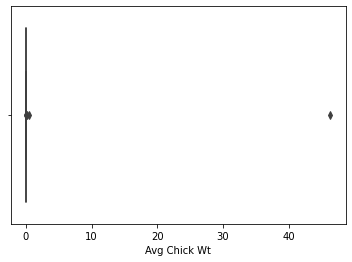

In [25]:
ax1 = sns.boxplot(x=All_data["Avg Chick Wt"])
median = All_data['Avg Chick Wt'].median()
std = All_data['Avg Chick Wt'].std()
All_data['Avg Chick Wt']= [np.nan if abs((x - median)) > std   else x  for x in All_data['Avg Chick Wt']]
All_data['Avg Chick Wt'].fillna(median, inplace=True)

<ipython-input-26-0402d382c603>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  All_data['Avg Chick Wt']= [np.nan if abs((x - median)) > 0.02   else x  for x in All_data['Avg Chick Wt']]
C:\Users\dados\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


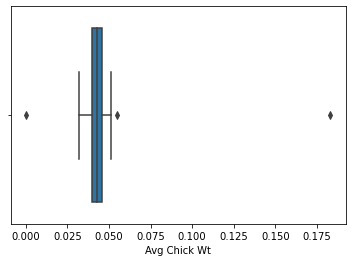

In [26]:
ax1 = sns.boxplot(x=All_data["Avg Chick Wt"])
median = All_data['Avg Chick Wt'].median()
std = All_data['Avg Chick Wt'].std()
All_data['Avg Chick Wt']= [np.nan if abs((x - median)) > 0.02   else x  for x in All_data['Avg Chick Wt']]
All_data['Avg Chick Wt'].fillna(median, inplace=True)

In [27]:
Q1 = np.median(All_data['Avg Chick Wt'][:10])
Q1

0.04

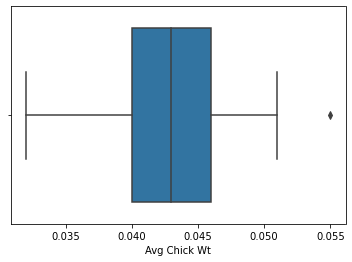

In [28]:
ax1 = sns.boxplot(x=All_data["Avg Chick Wt"])

<ipython-input-29-7fc4245d8444>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  All_data['Total Mortality Dead']= [np.nan if abs((x - median)) > 3000   else x  for x in All_data['Total Mortality Dead']]
C:\Users\dados\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


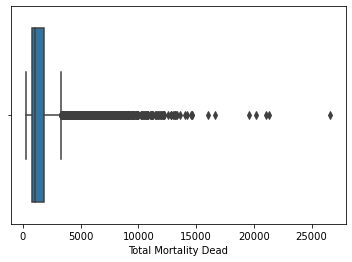

In [29]:
ax1 = sns.boxplot(x=All_data["Total Mortality Dead"])
median = All_data['Total Mortality Dead'].median()
std = All_data['Total Mortality Dead'].std()
All_data['Total Mortality Dead']= [np.nan if abs((x - median)) > 3000   else x  for x in All_data['Total Mortality Dead']]
All_data['Total Mortality Dead'].fillna(median, inplace=True)

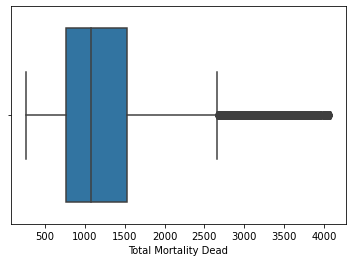

In [30]:
ax1 = sns.boxplot(x=All_data["Total Mortality Dead"])

In [31]:
All_data['Cycle time (first placed date (next) - first placed date (current))'].median()

59.0

<ipython-input-32-b388e379b35e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  All_data['Cycle time (first placed date (next) - first placed date (current))']= [np.nan if abs((x - median)) > 30   else x  for x in All_data['Cycle time (first placed date (next) - first placed date (current))']]
C:\Users\dados\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


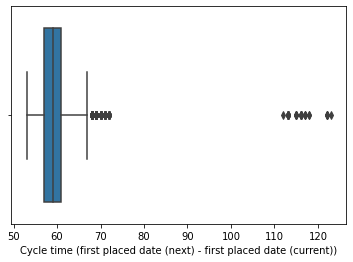

In [32]:
ax1 = sns.boxplot(x=All_data["Cycle time (first placed date (next) - first placed date (current))"])
median = All_data['Cycle time (first placed date (next) - first placed date (current))'].median()
std = All_data['Cycle time (first placed date (next) - first placed date (current))'].std()
All_data['Cycle time (first placed date (next) - first placed date (current))']= [np.nan if abs((x - median)) > 30   else x  for x in All_data['Cycle time (first placed date (next) - first placed date (current))']]
All_data['Cycle time (first placed date (next) - first placed date (current))'].fillna(median, inplace=True)


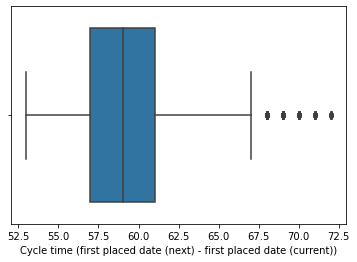

In [33]:
ax1 = sns.boxplot(x=All_data["Cycle time (first placed date (next) - first placed date (current))"])

<ipython-input-34-383a6fa4ac77>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  All_data['Cleaning period']= [np.nan if abs((x - median)) > 35   else x  for x in All_data['Cleaning period']]
C:\Users\dados\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


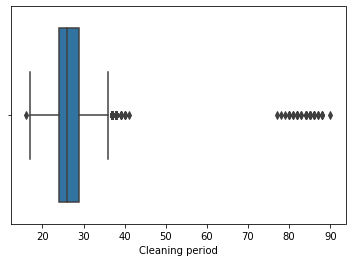

In [34]:
ax1 = sns.boxplot(x=All_data["Cleaning period"])
median = All_data['Cleaning period'].median()
std = All_data['Cleaning period'].std()
All_data['Cleaning period']= [np.nan if abs((x - median)) > 35   else x  for x in All_data['Cleaning period']]
All_data['Cleaning period'].fillna(median, inplace=True)

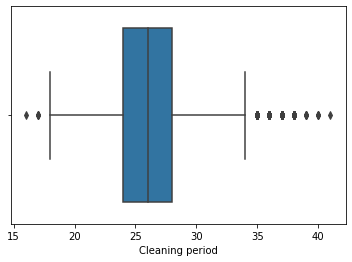

In [35]:
ax1 = sns.boxplot(x=All_data["Cleaning period"])

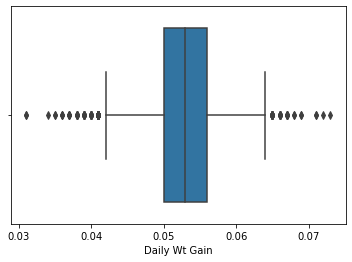

In [36]:
ax1 = sns.boxplot(x=All_data["Daily Wt Gain"])

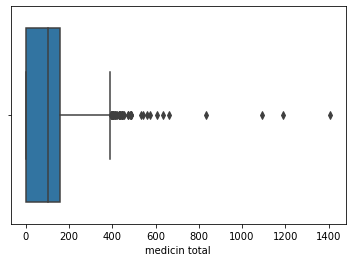

In [37]:
ax1 = sns.boxplot(x=All_data["medicin total"])

In [38]:
All_data['medicin total'].median()

103.2495

In [39]:
median = All_data['medicin total'].median()
std = All_data['medicin total'].std()
All_data['medicin total']= [np.nan if abs((x - median)) > 700   else x  for x in All_data['medicin total']]
All_data['medicin total'].fillna(median, inplace=True)

<ipython-input-39-c025c13392cd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  All_data['medicin total']= [np.nan if abs((x - median)) > 700   else x  for x in All_data['medicin total']]
C:\Users\dados\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


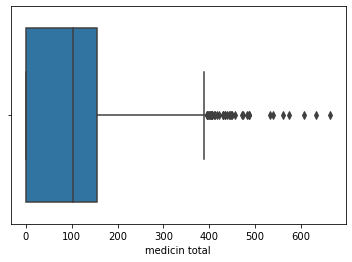

In [40]:
ax1 = sns.boxplot(x=All_data["medicin total"])

In [41]:
All_data['Feed Conversion CPC'].median()

1.53

<ipython-input-42-85345eb4ff1d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  All_data['Feed Conversion CPC']= [np.nan if abs((x - median)) > 2.5   else x  for x in All_data['Feed Conversion CPC']]
C:\Users\dados\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


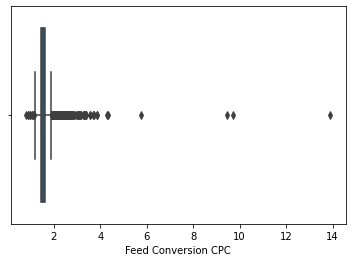

In [42]:
ax1 = sns.boxplot(x=All_data["Feed Conversion CPC"])
median = All_data['Feed Conversion CPC'].median()
std = All_data['Feed Conversion CPC'].std()
All_data['Feed Conversion CPC']= [np.nan if abs((x - median)) > 2.5   else x  for x in All_data['Feed Conversion CPC']]
All_data['Feed Conversion CPC'].fillna(median, inplace=True)

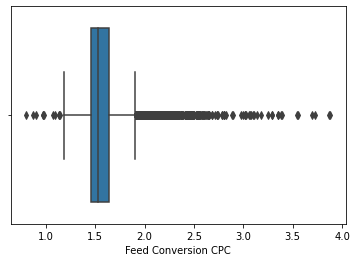

In [43]:
ax1 = sns.boxplot(x=All_data["Feed Conversion CPC"])

## D-  Standardizing data 

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
All_data[['Placement Density (chicks/m2)', 'Avg Chick Wt', 'Age - End of Sales', 'Total Mortality Dead', 'Feed Conversion CPC', 'Daily Wt Gain','Cycle time (first placed date (next) - first placed date (current))', 'Cleaning period', 'medicin total']] = StandardScaler().fit_transform(All_data[['Placement Density (chicks/m2)', 'Avg Chick Wt', 'Age - End of Sales', 'Total Mortality Dead', 'Feed Conversion CPC', 'Daily Wt Gain','Cycle time (first placed date (next) - first placed date (current))', 'Cleaning period', 'medicin total']])

<ipython-input-45-6abecf20fae5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  All_data[['Placement Density (chicks/m2)', 'Avg Chick Wt', 'Age - End of Sales', 'Total Mortality Dead', 'Feed Conversion CPC', 'Daily Wt Gain','Cycle time (first placed date (next) - first placed date (current))', 'Cleaning period', 'medicin total']] = StandardScaler().fit_transform(All_data[['Placement Density (chicks/m2)', 'Avg Chick Wt', 'Age - End of Sales', 'Total Mortality Dead', 'Feed Conversion CPC', 'Daily Wt Gain','Cycle time (first placed date (next) - first placed date (current))', 'Cleaning period', 'medicin total']])
C:\Users\dados\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of

# 2- Data exploration Explore features or charecteristics to predict


## Objectives

-   histograms
-   correlation 
-   ANOVA


#### a- show histogram for numeric features

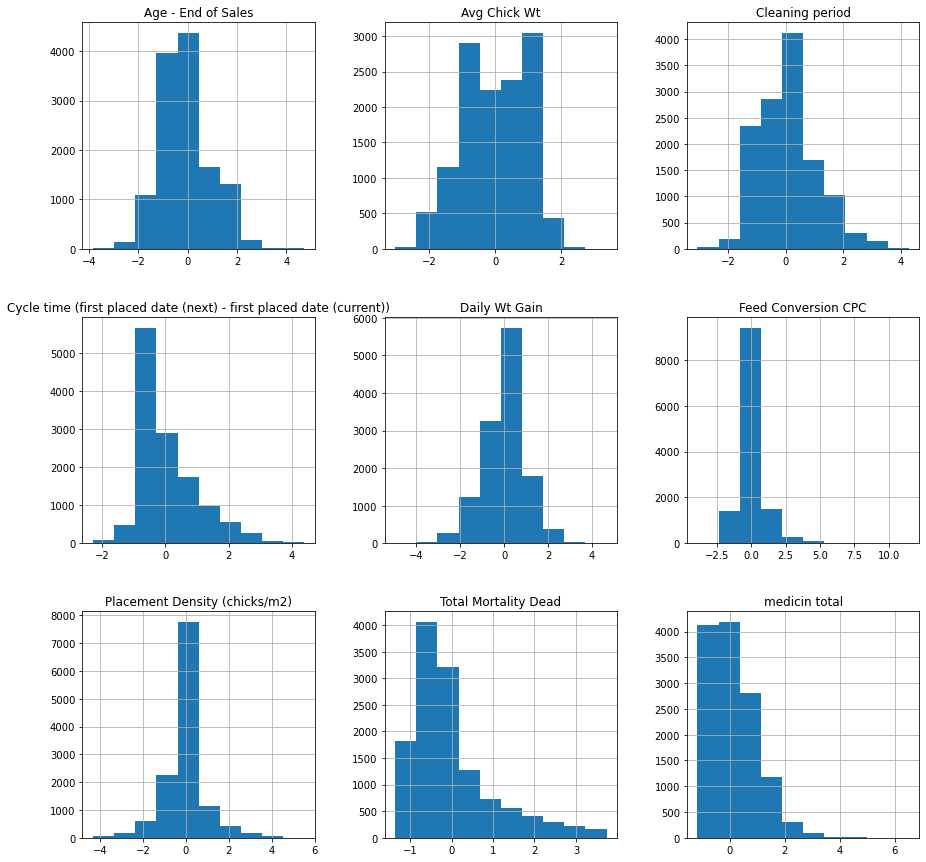

In [46]:
All_data[['Placement Density (chicks/m2)', 'Avg Chick Wt', 'Age - End of Sales', 'Total Mortality Dead', 'Feed Conversion CPC', 'Daily Wt Gain','Cycle time (first placed date (next) - first placed date (current))', 'Cleaning period', 'medicin total']].hist(bins=10, figsize=(15,15))
plt.show()

#### b- chats for categorial features

Text(0.5, 0.9, 'Hatch Hatchery List')

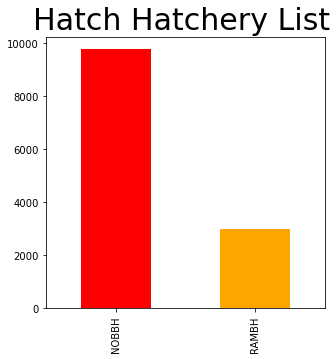

In [47]:
All_data['Hatch Hatchery List'].value_counts().plot.bar(x='Hatch Hatchery List', figsize=(5, 5), color=['red', 'orange'])
plt.figtext(0.5,.9,'Hatch Hatchery List',fontsize=30,ha='center')

#### c- correlation matrix

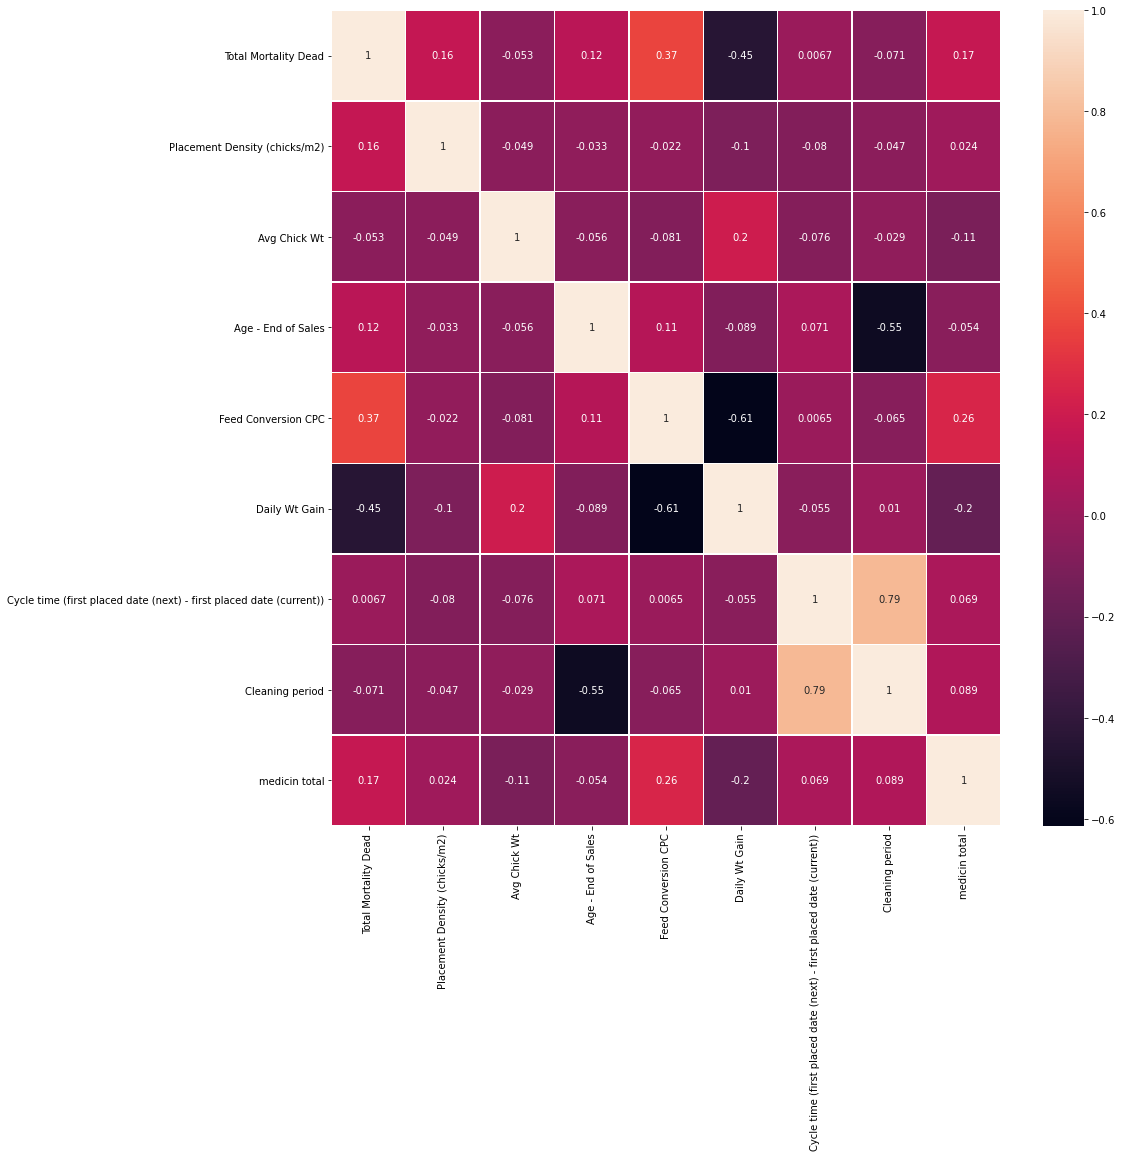

In [48]:
corrlation_matrix = plt.subplots(figsize=(15, 15))
corrlation_matrix =sns.heatmap(All_data[['Total Mortality Dead','Placement Density (chicks/m2)', 'Avg Chick Wt', 'Age - End of Sales',  'Feed Conversion CPC', 'Daily Wt Gain','Cycle time (first placed date (next) - first placed date (current))', 'Cleaning period', 'medicin total']].corr(),annot=True, linewidth=0.5)

#### d- T test for two independent sample

###### I: mortality grouped by Hatchery

In [49]:
from scipy.stats import ttest_ind

NOBBH_mortality = All_data[All_data['Hatch Hatchery List'] == 'NOBBH']['Total Mortality Dead']
RAMBH_mortality= All_data[All_data['Hatch Hatchery List'] == 'RAMBH']['Total Mortality Dead']
stats.ttest_ind(NOBBH_mortality, RAMBH_mortality) 

Ttest_indResult(statistic=1.3744962446424005, pvalue=0.1693118552044736)

###### II: mortality grouped by season

In [50]:
winter_mortality = All_data[All_data['season'] == 1]['Total Mortality Dead']
summer_mortality= All_data[All_data['season'] == 2]['Total Mortality Dead']
stats.ttest_ind(winter_mortality, summer_mortality) 

Ttest_indResult(statistic=13.364470234258505, pvalue=1.8261543588427798e-40)

there are significnt differance in mortality based on season as p-value is less than 0.05

#### e- ANOVA test 

###### I: mortality grouped by entity

In [51]:
from scipy import stats
grps = [d['Total Mortality Dead'].tolist() for _, d in All_data.groupby('entity')]
F, p = stats.f_oneway(*grps)
print(F, p)

5.170437233584981 1.7535673825506694e-178


there are significnt differance in mortality based on entity as p-value is less than 0.05

###### II: mortality grouped by month

In [52]:
grps1 = [d['Total Mortality Dead'].tolist() for _, d in All_data.groupby('month')]
F1, p1 = stats.f_oneway(*grps1)
print(F1, p1)

48.14731087490903 2.726962389252772e-104


there are significnt differance in mortality based on month as p-value is less than 0.05

###### III: mortality grouped by period

In [53]:
grps2 = [d['Total Mortality Dead'].tolist() for _, d in All_data.groupby('period')]
F2, p2 = stats.f_oneway(*grps2)
print(F2, p2)

66.15311326570367 1.9213382969399624e-68


there are significnt differance in mortality based on period as p-value is less than 0.05

# 3- Model Development

## Objective:

-   Develop prediction models

### A) linear regression 

In [54]:
from sklearn import preprocessing
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split

##### a)split features and lables

In [55]:
x=All_data[['Placement Density (chicks/m2)','Avg Chick Wt','Feed Conversion CPC','Daily Wt Gain', 'Cycle time (first placed date (next) - first placed date (current))','Cleaning period','month','season','period','medicin total','entity_code','Hatch Hatchery List_code']]
y=All_data['Total Mortality Dead']

##### b)stepwise regression to determine which feature are important and which to remove 

In [56]:
import statsmodels.api as sm
def stepwise_selection(X, y, 
                           initial_list=[], 
                           threshold_in=0.01, 
                           threshold_out = 0.05, 
                           verbose=True):
        """ Perform a forward-backward feature selection 
        based on p-value from statsmodels.api.OLS
        Arguments:
            X - pandas.DataFrame with candidate features
            y - list-like with the target
            initial_list - list of features to start with (column names of X)
            threshold_in - include a feature if its p-value < threshold_in
            threshold_out - exclude a feature if its p-value > threshold_out
            verbose - whether to print the sequence of inclusions and exclusions
        Returns: list of selected features 
        Always set threshold_in < threshold_out to avoid infinite looping.
        See https://en.wikipedia.org/wiki/Stepwise_regression for the details
        """
        included = list(initial_list)
        while True:
            changed=False
            # forward step
            excluded = list(set(X.columns)-set(included))
            new_pval = pd.Series(index=excluded)
            for new_column in excluded:
                model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
                new_pval[new_column] = model.pvalues[new_column]
            best_pval = new_pval.min()
            if best_pval < threshold_in:
                best_feature = new_pval.idxmin()
                included.append(best_feature)
                changed=True
                if verbose:
                    print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

            # backward step
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
            # use all coefs except intercept
            pvalues = model.pvalues.iloc[1:]
            worst_pval = pvalues.max() # null if pvalues is empty
            if worst_pval > threshold_out:
                changed=True
                worst_feature = pvalues.idxmax()
                included.remove(worst_feature)
                if verbose:
                    print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
            if not changed:
                break
        return included
    
result = stepwise_selection(x,y)
print('resulting features:')
print(result)


<ipython-input-56-3a83d1da4f67>:25: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  Daily Wt Gain                  with p-value 0.0
Add  period                         with p-value 4.60817e-83
Add  Placement Density (chicks/m2)  with p-value 1.17087e-52
Add  Feed Conversion CPC            with p-value 1.13136e-62
Add  month                          with p-value 4.80091e-23
Add  medicin total                  with p-value 1.11367e-16
Add  season                         with p-value 3.66818e-06
Add  Hatch Hatchery List_code       with p-value 2.18813e-05
Add  Cycle time (first placed date (next) - first placed date (current)) with p-value 0.000123546
Add  Cleaning period                with p-value 5.80274e-12
resulting features:
['Daily Wt Gain', 'period', 'Placement Density (chicks/m2)', 'Feed Conversion CPC', 'month', 'medicin total', 'season', 'Hatch Hatchery List_code', 'Cycle time (first placed date (next) - first placed date (current))', 'Cleaning period']


##### c)Multi regression to with  important features 

In [57]:
Z = All_data[['Daily Wt Gain', 'period', 'Placement Density (chicks/m2)', 'Feed Conversion CPC', 'month', 'medicin total', 'season', 'Hatch Hatchery List_code', 'Cycle time (first placed date (next) - first placed date (current))', 'Cleaning period']]

In [58]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(Z, All_data['Total Mortality Dead'])

LinearRegression()

In [59]:
lm.intercept_

-0.028582971505096973

In [60]:
lm.coef_

array([-0.34152507,  0.07873736,  0.13853222,  0.13358919, -0.01966684,
        0.06626978, -0.09293115,  0.08325794,  0.10050195, -0.09139273])

the linear function we get is 

Total Mortality Dead= -0.028582971505096973-0.34152507 Daily Wt Gain + 0.07873736 period + 0.13853222 Placement Density +  0.13358919 Feed Conversion -0.01966684 month + 0.06626978 medicin total-0.09293115 season + 0.08325794 Hatchery  + 0.10050195Cycle time -0.09139273 Cleaning period

##### d) Model Evaluation

In [61]:
#calculate the R^2
# fit the model 
lm.fit(Z, All_data['Total Mortality Dead'])
# Find the R^2
print('The R-square is: ', lm.score(Z, All_data['Total Mortality Dead']))

The R-square is:  0.2699533892276642


We can say that ~ 27 % of the variation of Mortality is explained by this multiple linear regression "multi_fit".

In [62]:
#calculate the MSE
from sklearn.metrics import mean_squared_error
Y_predict_multifit = lm.predict(Z)
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(All_data['Total Mortality Dead'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  0.7300466107723358
